In [1]:
## building a deep learning model to classify the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



In [3]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [4]:
y_train[70]

array([0., 0., 0., 0., 1.], dtype=float32)

In [15]:
model = Sequential()

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [16]:
history = model.fit(x = X_train, y = y_train, epochs = 200, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/200
3822/3822 [==============================] - 5s 1ms/step - loss: 0.8842 - accuracy: 0.6362 - val_loss: 0.7807 - val_accuracy: 0.6738
Epoch 2/200
3822/3822 [==============================] - 5s 1ms/step - loss: 0.8034 - accuracy: 0.6656 - val_loss: 0.7801 - val_accuracy: 0.6667
Epoch 3/200
3822/3822 [==============================] - 5s 1ms/step - loss: 0.7948 - accuracy: 0.6678 - val_loss: 0.7732 - val_accuracy: 0.6707
Epoch 4/200
3822/3822 [==============================] - 5s 1ms/step - loss: 0.7893 - accuracy: 0.6692 - val_loss: 0.7730 - val_accuracy: 0.6736
Epoch 5/200
3822/3822 [==============================] - 5s 1ms/step - loss: 0.7881 - accuracy: 0.6696 - val_loss: 0.7683 - val_accuracy: 0.6769
Epoch 6/200
3822/3822 [==============================] - 5s 1ms/step - loss: 0.7867 - accuracy: 0.6716 - val_loss: 0.7707 - val_accuracy: 0.6758
Epoch 7/200
3822/3822 [==============================] - 5s 1ms/step - loss: 0.7854 - accuracy: 0.6724 - val_loss: 0.7857 - val_ac

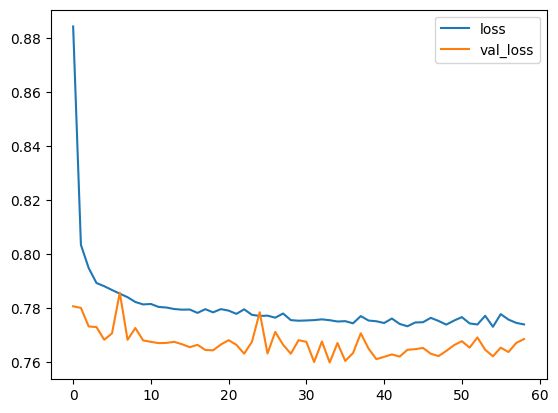

In [17]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()
plt.show()

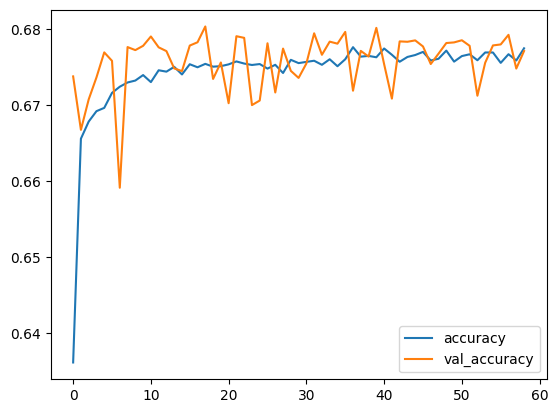

In [18]:
losses[['accuracy', 'val_accuracy']].plot()
plt.show()

In [20]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']


In [21]:
preds = model.predict(X_test)

1883/1883 [==============================] - 1s 420us/step


In [24]:
print(preds[0])

[0.18643743 0.00236117 0.6302657  0.01894483 0.16199084]


In [25]:
print(np.sum(preds[0]))

0.99999994


In [26]:
matrix = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

In [27]:
matrix

array([[ 4401,     0,   992,   150,  9803],
       [    2,     0,     8,     0,   776],
       [   54,     0,  2496,    28,   139],
       [   66,     0,    17,  2433,  3281],
       [ 1919,     0,  1280,   934, 31453]])

In [29]:
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.68      0.29      0.40     15346
           1       0.00      0.00      0.00       786
           2       0.52      0.92      0.66      2717
           3       0.69      0.42      0.52      5797
           4       0.69      0.88      0.78     35586

    accuracy                           0.68     60232
   macro avg       0.52      0.50      0.47     60232
weighted avg       0.67      0.68      0.64     60232



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
